Goal for this project is to do my first machine learning project.  

Want to take all the stats for Madden 18 players, and see if I can correctly categorize them into offense, defense, or special teams using machine learning. 

While I think some of it should be pretty easy (for example, only punters should be good at punting), I bet there will be some instance where it is a little more difficult (the difference between wide recievers and corner backs).  

Also curious to see how accurate I can get with different amount of data.  My initial reaction is that more data is always better, but it might lead to over fitting.  So could I do it with a little bit of data?

Also, think it would be a good way to explore some different ML algorithms.  Conceptiionally, I think SVM and K-means clutering would be good to look at.  But also, maybe decision trees and random forest?  Let's find out

In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
df = pd.read_csv("player_stat_18.csv")

In [3]:
df.head()

,Last Name,First Name,Position,Dev Trait,Overall Rating,Speed,Acceleration,Strength,Agility,Awareness,...,Height,Weight,Age,Birthdate,Years Pro,College,Total Salary,Signing Bonus,Handedness,portraitId
0,Juszczyk,Kyle,FB,QUICK,91,82,88,79,78,85,...,73,240,26,4/23/91,4,Harvard,15600000,5000000,Right,6869
1,Bowman,NaVorro,MLB,STAR,88,83,87,80,83,90,...,72,242,29,5/28/88,7,Penn State,42750000,10000000,Left,480
2,Garcon,Pierre,WR,-,85,89,91,66,87,92,...,72,211,31,8/8/86,9,Mount Union,35000000,7000000,Right,1209
3,Dumervil,Elvis,RE,-,83,75,82,78,78,91,...,71,255,33,1/19/84,11,Louisville,5000000,2000000,Right,1004
4,Hyde,Carlos,HB,-,83,88,90,81,91,84,...,72,228,26,9/20/90,3,Ohio State,3600000,1600000,Right,6456


In [4]:
df.tail()

,Last Name,First Name,Position,Dev Trait,Overall Rating,Speed,Acceleration,Strength,Agility,Awareness,...,Height,Weight,Age,Birthdate,Years Pro,College,Total Salary,Signing Bonus,Handedness,portraitId
2348,Wilson,Eric,LOLB,-,61,86,90,74,85,50,...,74,225,22,9/26/94,0,Cincinnati,1665000,0,Right,0
2349,Heinicke,Taylor,QB,-,58,84,83,53,78,52,...,73,210,24,3/15/93,2,Old Dominion,1570000,0,Right,7169
2350,Carter,Kyle,TE,-,57,84,86,70,82,40,...,75,245,24,12/17/92,1,Penn State,1020000,0,Right,7941
2351,Robinson,Edmond,LOLB,-,57,85,88,72,79,45,...,75,245,25,1/1/92,2,Newberry College,1800000,200000,Right,7591
2352,McDermott,Kevin,TE,-,50,72,81,64,70,60,...,77,240,27,1/12/90,4,UCLA,3960000,0,Right,6779


In [5]:
df.sample(5)

,Last Name,First Name,Position,Dev Trait,Overall Rating,Speed,Acceleration,Strength,Agility,Awareness,...,Height,Weight,Age,Birthdate,Years Pro,College,Total Salary,Signing Bonus,Handedness,portraitId
1243,Wynn,Shane,WR,-,60,94,94,53,91,52,...,66,168,24,11/15/92,2,Indiana,540000,0,Right,7857
336,Sambrailo,Ty,RT,SLOW,70,60,76,79,66,72,...,77,315,25,3/10/92,2,Colorado St.,3600000,1200000,Right,7307
952,Okoye,Lawrence,RE,SLOW,56,77,85,85,72,51,...,78,304,25,10/6/91,4,No College,1025000,0,Right,7566
1083,Fuller,Devin,WR,-,62,93,89,56,90,55,...,72,194,23,1/29/94,1,UCLA,2410000,70000,Right,8012
1972,Grayson,Garrett,QB,-,62,81,83,55,72,54,...,74,220,26,5/29/91,2,Colorado St.,1170000,0,Right,7146


In [6]:
df.columns

Index(['Last Name', 'First Name', 'Position', 'Dev Trait', 'Overall Rating',
       'Speed', 'Acceleration', 'Strength', 'Agility', 'Awareness', 'Catching',
       'Carrying', 'Throw Power', 'Throw Accuracy', 'Kick Power',
       'Kick Accuracy', 'Run Block', 'Pass Block', 'Tackle', 'Jumping',
       'Kick Return', 'Injury', 'Stamina', 'Toughness', 'Trucking',
       'Elusiveness', 'Ball Carrier Vision', 'Stiff Arm', 'Spin Move',
       'Juke Move', 'Impact Blocking', 'Run Block Strength',
       'Run Block Footwork', 'Pass Block Strength', 'Pass Block Footwork',
       'Power Moves', 'Finesse Moves', 'Block Shedding', 'Pursuit',
       'Play Recognition', 'Man Coverage', 'Zone Coverage',
       'Spectacular Catch', 'Catch In Traffic', 'Route Running', 'Hit Power',
       'Press', 'Release', 'Throw Accuracy Short', 'Throw Accuracy Mid',
       'Throw Accuracy Deep', 'Play Action', 'Throw on the Run', 'Height',
       'Weight', 'Age', 'Birthdate', 'Years Pro', 'College', 'Total Salary',

In [7]:
pos_list = list(df['Position'].unique())

In [8]:
print(pos_list)

['FB', 'MLB', 'WR', 'RE', 'HB', 'LT', 'FS', 'LE', 'DT', 'SS', 'ROLB', 'TE', 'K', 'CB', 'LOLB', 'RT', 'QB', 'P', 'C', 'LG', 'RG']


In [9]:
pos_list.sort()
print(pos_list)

['C', 'CB', 'DT', 'FB', 'FS', 'HB', 'K', 'LE', 'LG', 'LOLB', 'LT', 'MLB', 'P', 'QB', 'RE', 'RG', 'ROLB', 'RT', 'SS', 'TE', 'WR']


In [10]:
off_pos_list = ['C','FB','HB','LG','LT','QB','RG','RT','TE','WR']
def_pos_list = ['CB','DT','FS','LE','LOLB','MLB','RE','ROLB','SS']
sTeams_pos_list = ['K','P']

In [11]:
len(pos_list)

21

In [12]:
len(off_pos_list+def_pos_list+sTeams_pos_list)

21

In [13]:
def define_pos(x):
    if x in off_pos_list:
        return('Off')
    if x in def_pos_list:
        return('Def')
    if x in sTeams_pos_list:
        return('sTeams')
    else:
        return("Missing")

In [14]:
df['pos_class'] = df['Position'].apply(define_pos)
#need to write up a little bit better how the apply function works

#create a new colum named pos_class
#for the the position column, call the define pos function 

#need to double check how it working for the colums, not the rows

In [15]:
#confirms 
df[['Position','pos_class']]

,Position,pos_class
0,FB,Off
1,MLB,Def
2,WR,Off
3,RE,Def
4,HB,Off
5,LT,Off
6,HB,Off
7,FS,Def
8,LE,Def
9,DT,Def


In [16]:
#need to split my data into 70% training 30% testing

In [17]:
extra_cols = ['Last Name', 'First Name', 'Position','Birthdate','Years Pro','College','portraitId']
df.drop(extra_cols, inplace=True, axis=1) #need to write up a bit more on this works

In [18]:
df.columns

Index(['Dev Trait', 'Overall Rating', 'Speed', 'Acceleration', 'Strength',
       'Agility', 'Awareness', 'Catching', 'Carrying', 'Throw Power',
       'Throw Accuracy', 'Kick Power', 'Kick Accuracy', 'Run Block',
       'Pass Block', 'Tackle', 'Jumping', 'Kick Return', 'Injury', 'Stamina',
       'Toughness', 'Trucking', 'Elusiveness', 'Ball Carrier Vision',
       'Stiff Arm', 'Spin Move', 'Juke Move', 'Impact Blocking',
       'Run Block Strength', 'Run Block Footwork', 'Pass Block Strength',
       'Pass Block Footwork', 'Power Moves', 'Finesse Moves', 'Block Shedding',
       'Pursuit', 'Play Recognition', 'Man Coverage', 'Zone Coverage',
       'Spectacular Catch', 'Catch In Traffic', 'Route Running', 'Hit Power',
       'Press', 'Release', 'Throw Accuracy Short', 'Throw Accuracy Mid',
       'Throw Accuracy Deep', 'Play Action', 'Throw on the Run', 'Height',
       'Weight', 'Age', 'Total Salary', 'Signing Bonus', 'Handedness',
       'pos_class'],
      dtype='object')

In [19]:
#EDA section of the analysis 
#want to look where there is a lot of difference between all three categories
#sns.pairplot(df[['Overall Rating','Speed','pos_class']],hue = 'pos_class',diag_kind = 'kde')

#df.iloc[:,0:5]


In [24]:
print(plt.style.available)

['seaborn-paper', 'bmh', 'seaborn-dark-palette', 'seaborn-notebook', 'seaborn-colorblind', 'seaborn-talk', 'seaborn-deep', 'seaborn-poster', 'fivethirtyeight', 'seaborn-white', 'seaborn-muted', 'seaborn-bright', 'seaborn-pastel', 'seaborn-ticks', 'seaborn-whitegrid', 'ggplot', 'grayscale', 'classic', 'seaborn-dark', 'dark_background', 'seaborn-darkgrid']


pos_class
Def       Axes(0.125,0.125;0.775x0.775)
Off       Axes(0.125,0.125;0.775x0.775)
sTeams    Axes(0.125,0.125;0.775x0.775)
Name: Speed, dtype: object

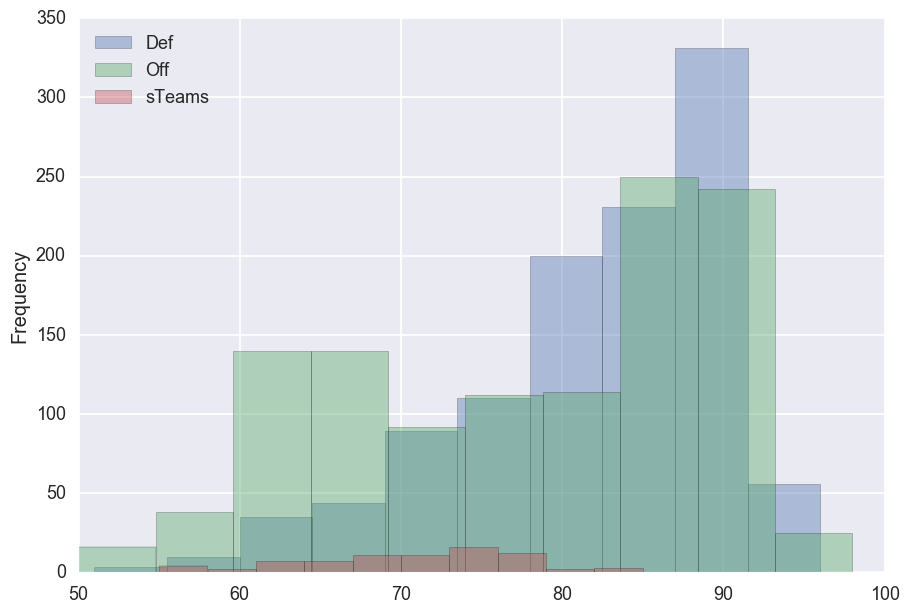

In [25]:
plt.style.use('seaborn-talk')
df.groupby('pos_class')['Speed'].plot(kind = 'hist', alpha = .4, legend = True)

TypeError: Series.name must be a hashable type

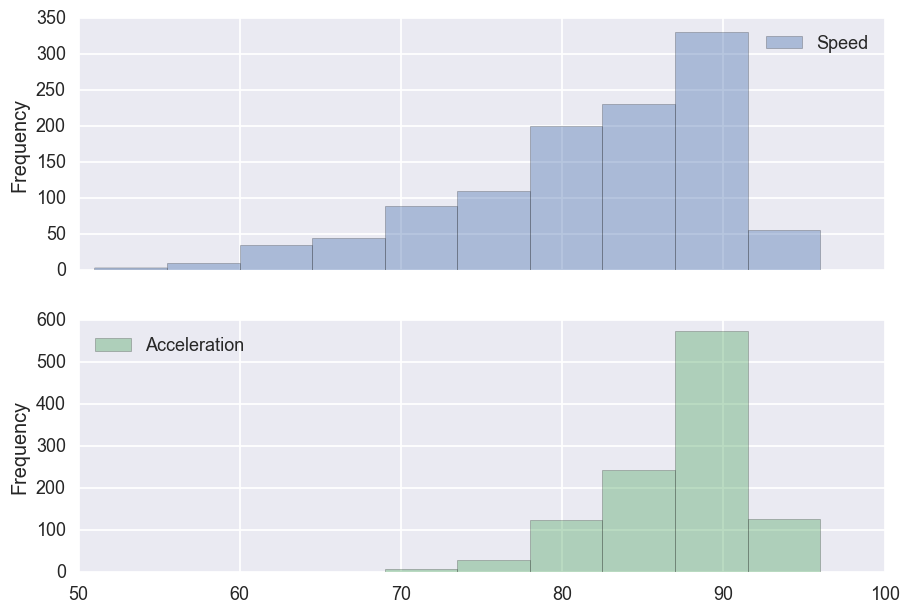

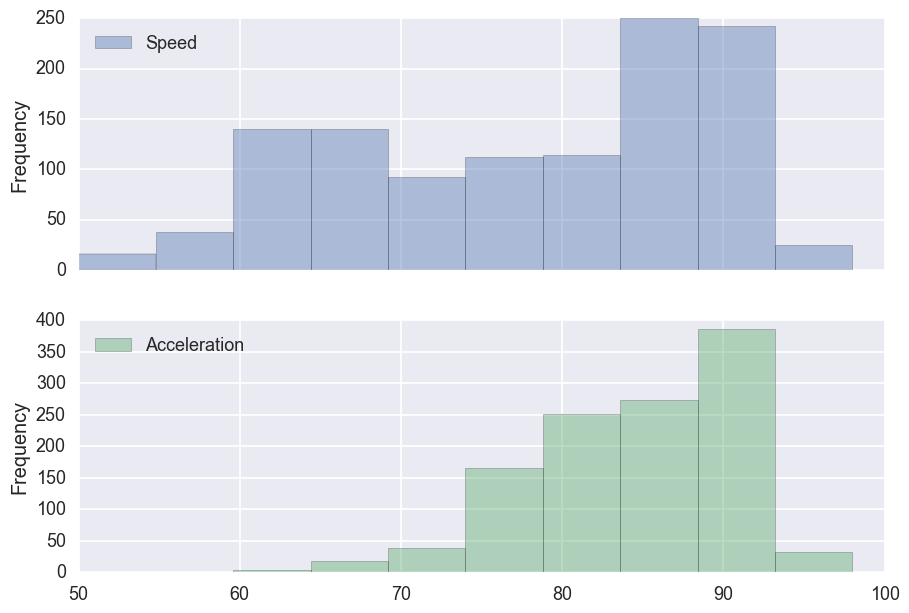

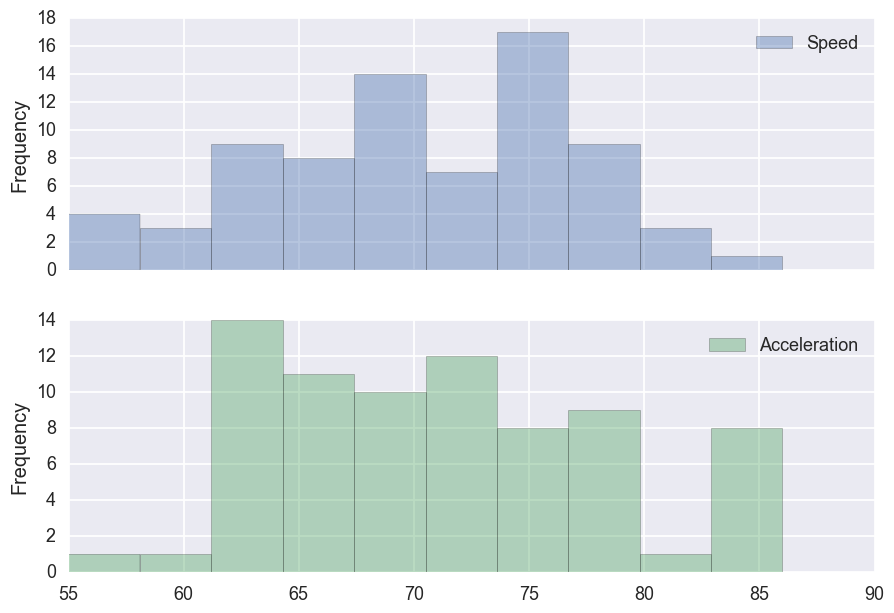

In [26]:
df.groupby('pos_class')['Speed',"Acceleration"].plot(kind = 'hist', alpha = .4, legend = True,subplots = True)

pos_class
Def       [[Axes(0.125,0.125;0.215278x0.775), Axes(0.404...
Off       [[Axes(0.125,0.125;0.215278x0.775), Axes(0.404...
sTeams    [[Axes(0.125,0.125;0.215278x0.775), Axes(0.404...
dtype: object

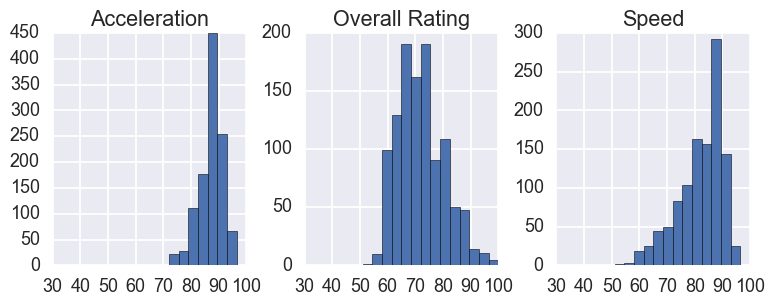

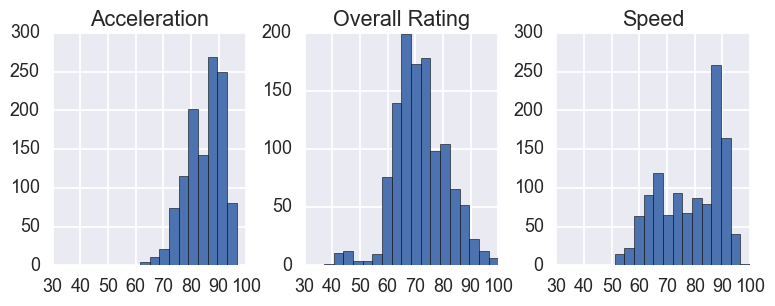

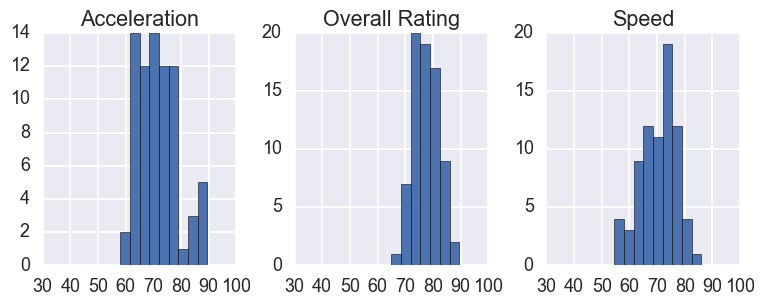

In [31]:
df[['Overall Rating', 'Speed', 'Acceleration','pos_class']].groupby('pos_class').hist(
    figsize=(9,3),
    layout =(1,3),
    bins = 20,
    range=[30,100]
)
#probably could get away with a ton of variables at a time in need be

In [32]:
df.columns

Index(['Dev Trait', 'Overall Rating', 'Speed', 'Acceleration', 'Strength',
       'Agility', 'Awareness', 'Catching', 'Carrying', 'Throw Power',
       'Throw Accuracy', 'Kick Power', 'Kick Accuracy', 'Run Block',
       'Pass Block', 'Tackle', 'Jumping', 'Kick Return', 'Injury', 'Stamina',
       'Toughness', 'Trucking', 'Elusiveness', 'Ball Carrier Vision',
       'Stiff Arm', 'Spin Move', 'Juke Move', 'Impact Blocking',
       'Run Block Strength', 'Run Block Footwork', 'Pass Block Strength',
       'Pass Block Footwork', 'Power Moves', 'Finesse Moves', 'Block Shedding',
       'Pursuit', 'Play Recognition', 'Man Coverage', 'Zone Coverage',
       'Spectacular Catch', 'Catch In Traffic', 'Route Running', 'Hit Power',
       'Press', 'Release', 'Throw Accuracy Short', 'Throw Accuracy Mid',
       'Throw Accuracy Deep', 'Play Action', 'Throw on the Run', 'Height',
       'Weight', 'Age', 'Total Salary', 'Signing Bonus', 'Handedness',
       'pos_class'],
      dtype='object')

In [33]:
#list of stats I want to explore

speed_stats = ['Speed', 'Acceleration','Agility','Elusiveness','pos_class']
throw_stats = ['Throw Power','Throw Accuracy', 'Throw Accuracy Short', 'Throw Accuracy Mid',
               'Throw Accuracy Deep', 'Play Action', 'Throw on the Run','pos_class']
special_stats = ['Kick Power', 'Kick Accuracy','pos_class']
physical_stats = ['Strength','Injury', 'Stamina','Toughness','Height','Weight', 'Age','pos_class']
run_stats = ['Trucking',  'Ball Carrier Vision','Stiff Arm', 'Spin Move', 'Juke Move','pos_class']
block_stats = ['Run Block','Pass Block','Impact Blocking','Run Block Strength', 
               'Run Block Footwork', 'Pass Block Strength','Pass Block Footwork','pos_class']
tackle_stats = ['Tackle','Power Moves', 'Finesse Moves', 'Block Shedding','Hit Power','pos_class']
wr_stats = ['Spectacular Catch', 'Catch In Traffic', 'Route Running','pos_class']
db_stats = ['Play Recognition', 'Man Coverage', 'Zone Coverage','Spectacular Catch','Press', 'Release','pos_class']

pos_class
Def       [[Axes(0.125,0.125;0.158163x0.775), Axes(0.330...
Off       [[Axes(0.125,0.125;0.158163x0.775), Axes(0.330...
sTeams    [[Axes(0.125,0.125;0.158163x0.775), Axes(0.330...
dtype: object

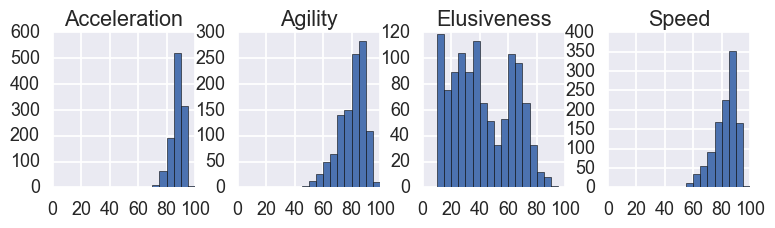

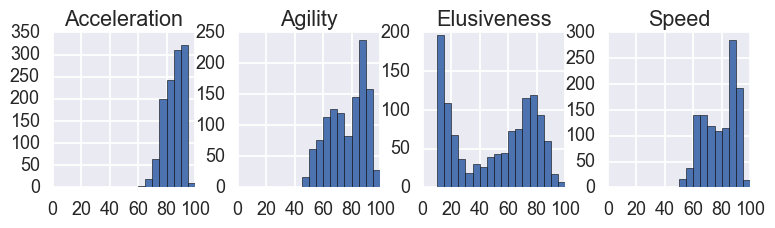

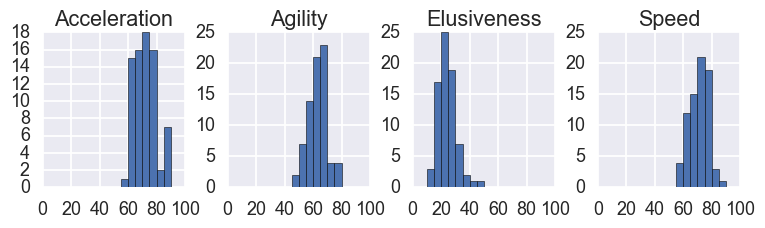

In [37]:
df[speed_stats].groupby('pos_class').hist(
    figsize=(9,2),
    layout= (1,4),
    bins =20, 
    range=[0, 100]
)

pos_class
Def       [[Axes(0.125,0.125;0.336957x0.775), Axes(0.563...
Off       [[Axes(0.125,0.125;0.336957x0.775), Axes(0.563...
sTeams    [[Axes(0.125,0.125;0.336957x0.775), Axes(0.563...
dtype: object

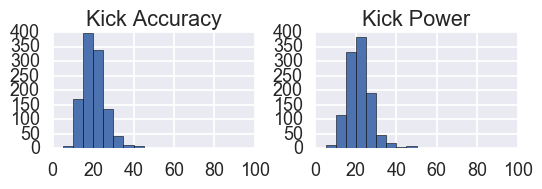

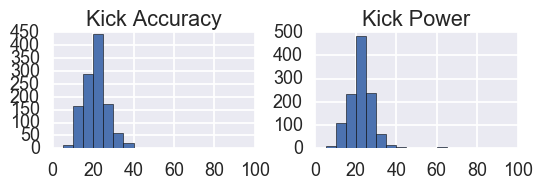

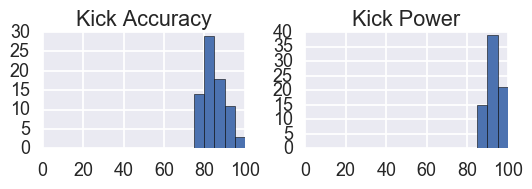

In [42]:
df[special_stats].groupby('pos_class').hist(
    figsize=(6,1.5),
    layout= (1,2),
    bins =20, 
    range=[0, 100]
)

Above suggests that all you need to do to id special teams is either kick accuracy or kick power.  Based on what I understand I think I only need to look at one moving forward.  So for my model, I'm going to include one or the other and then see how I in terms of accuarcy. 

So moving foward, going to drop all the instances of speacial teams and see if I can identify any instances where they are super differnet

In [43]:
dfOffnDef = df[df['pos_class'] != 'sTeams']

pos_class
Def    [[Axes(0.125,0.125;0.0880682x0.775), Axes(0.23...
Off    [[Axes(0.125,0.125;0.0880682x0.775), Axes(0.23...
dtype: object

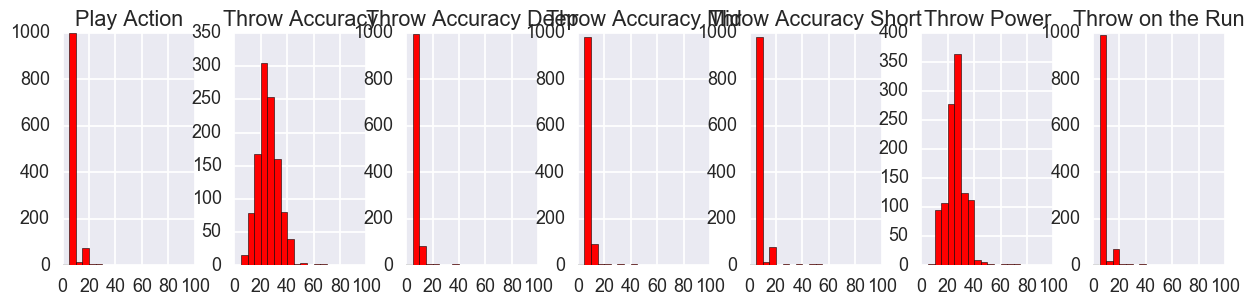

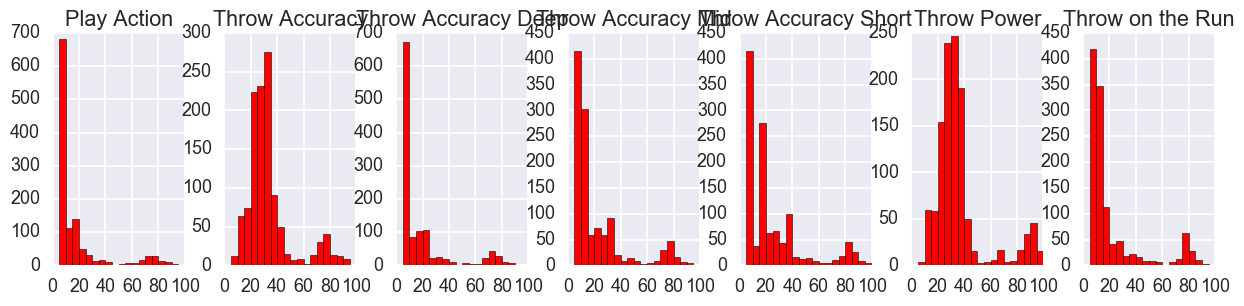

In [44]:
dfOffnDef[throw_stats].groupby('pos_class').hist(
    figsize=(15,3),
    layout = (1,7),
    bins =20, 
    range=[0, 100],
    color = 'red') #can I change this so the colors are different between offense and defense?  Maybe something 
#seaborn can do?

In [ ]:
#based on above, as expected, see a pretty uniform distribution for defense, where players aren't good at throwing
#for offense, see the expected bimodal distribution.  Most people can't throw, but the quarterbacks (and maybe some rb and wr)
#can as well

#let's select two options for it

#throw accuracy
#throw on the run


In [ ]:
#Need to look at Seaborn Facegrid.  Might help a lot for what I'm trying to do

pos_class
Def       AxesSubplot(0.125,0.125;0.775x0.755)
Off       AxesSubplot(0.125,0.125;0.775x0.755)
sTeams    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Acceleration, dtype: object

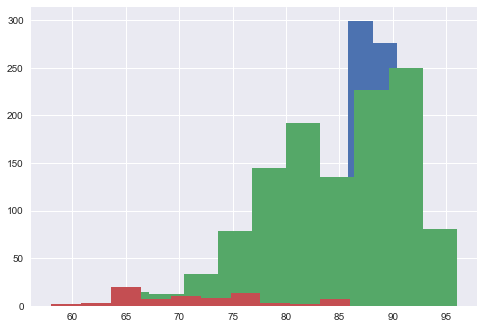

In [76]:
df.groupby('pos_class').Acceleration.hist()

In [69]:
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', '_classic_test']


In [28]:
#https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6


#defines pos_class as the target variable (what we are trying to predict)
y = df.pos_class


#important to understand that in the below code, I am using all variables as training data.  But I need to do some EDA to
#determine which variables have differences between the two groups




#create training and testing variables
X_train, X_test, y_train, y_test = train_test_split(df,y,test_size = 0.2)


In [31]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(1882, 57) (1882,)
(471, 57) (471,)


In [32]:
#
X_train.head()

,Dev Trait,Overall Rating,Speed,Acceleration,Strength,Agility,Awareness,Catching,Carrying,Throw Power,...,Throw Accuracy Deep,Play Action,Throw on the Run,Height,Weight,Age,Total Salary,Signing Bonus,Handedness,pos_class
1167,-,61,92,90,68,86,49,54,57,27,...,6,6,6,72,186,24,1020000,0,Right,Def
1384,-,64,90,92,68,87,54,77,69,62,...,47,40,61,69,189,24,1020000,0,Right,Off
219,-,59,77,81,79,73,41,34,40,24,...,6,6,6,78,276,23,1020000,0,Right,Def
1252,-,79,90,90,52,92,77,69,62,54,...,38,19,61,71,192,27,2500000,2000000,Right,Def
1972,-,62,81,83,55,72,54,28,57,89,...,69,72,75,74,220,26,1170000,0,Right,Off
